In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn
import math

In [2]:
df = pd.read_csv(r"D:\abalone.csv")

In [3]:
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


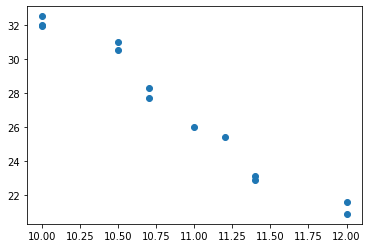

In [4]:

x = [10, 10.5, 10.7, 11, 11.2, 10, 10.5, 11.4, 10.7, 12, 10, 11.4, 12]
y = [31.9, 31, 27.7, 26, 25.4, 32.5, 30.5, 23.1, 28.3, 20.9, 32, 22.9, 21.6]
plt.plot(x, y, 'o')

Construct and analyze correlation plots for all pairs of quantitative indicators.

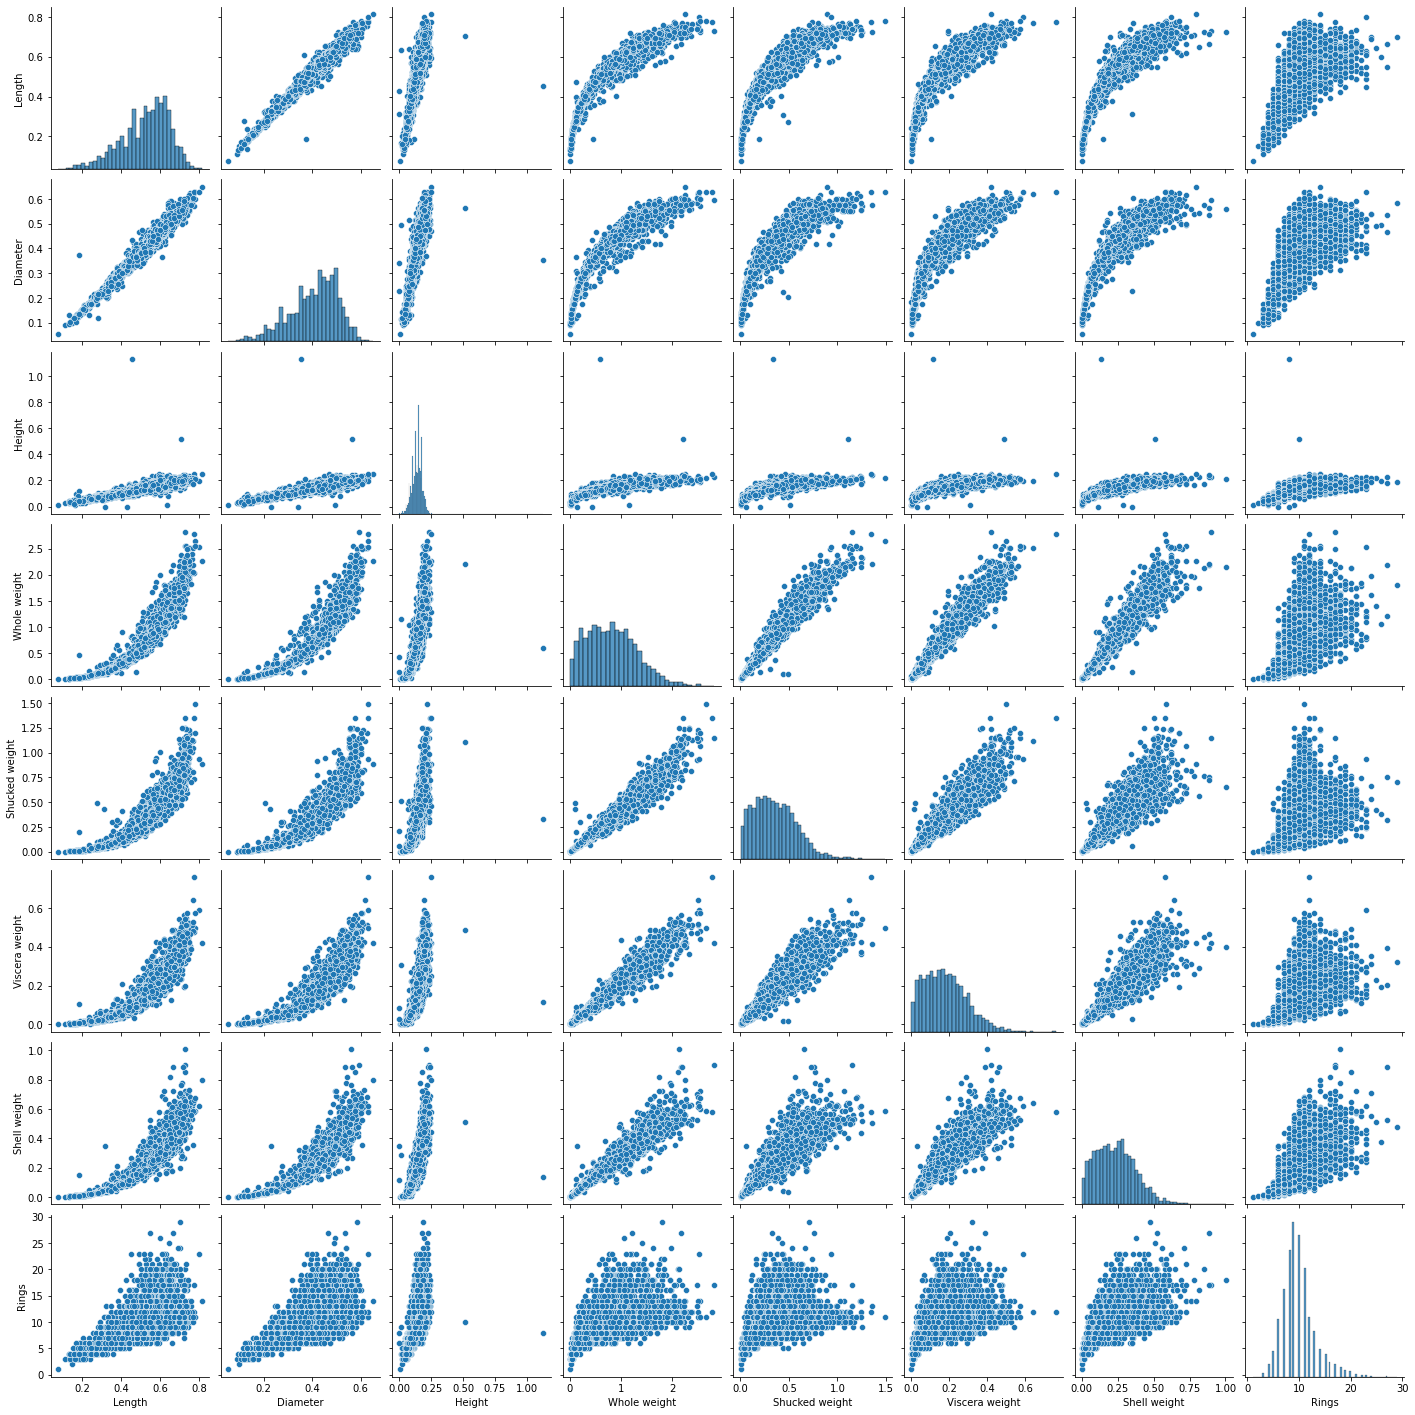

In [5]:
seaborn.pairplot(df)

Two anomalous values can be observed in the "Height" variable. Let's try to identify and remove them, and then redraw the correlation plots.

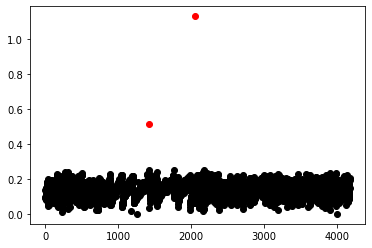

1417    0.515
2051    1.130
Name: Height, dtype: float64

In [6]:
def percentile(data, percentile):
    size = len(data)
    return sorted(data)[int(math.ceil(size * percentile) / 100) - 1]
def outliers(x, k = 3):
    q1 = percentile(x, 25) 
    q3 = percentile(x, 75) 
    a = q1 - k * (q3 - q1)
    b = q3 + k * (q3 - q1)
    notAnomaly = x.where((x >= a) & (x <= b))
    anomaly = x.loc[lambda m: (m < a) | (m > b)]
    plt.plot(notAnomaly, marker='o', color='black', ls='')
    plt.plot(anomaly, marker='o', color='red', ls='')
    plt.show()
    return anomaly
outliers(df['Height'])


In [7]:
df = df.loc[df['Height'] < 0.515]
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


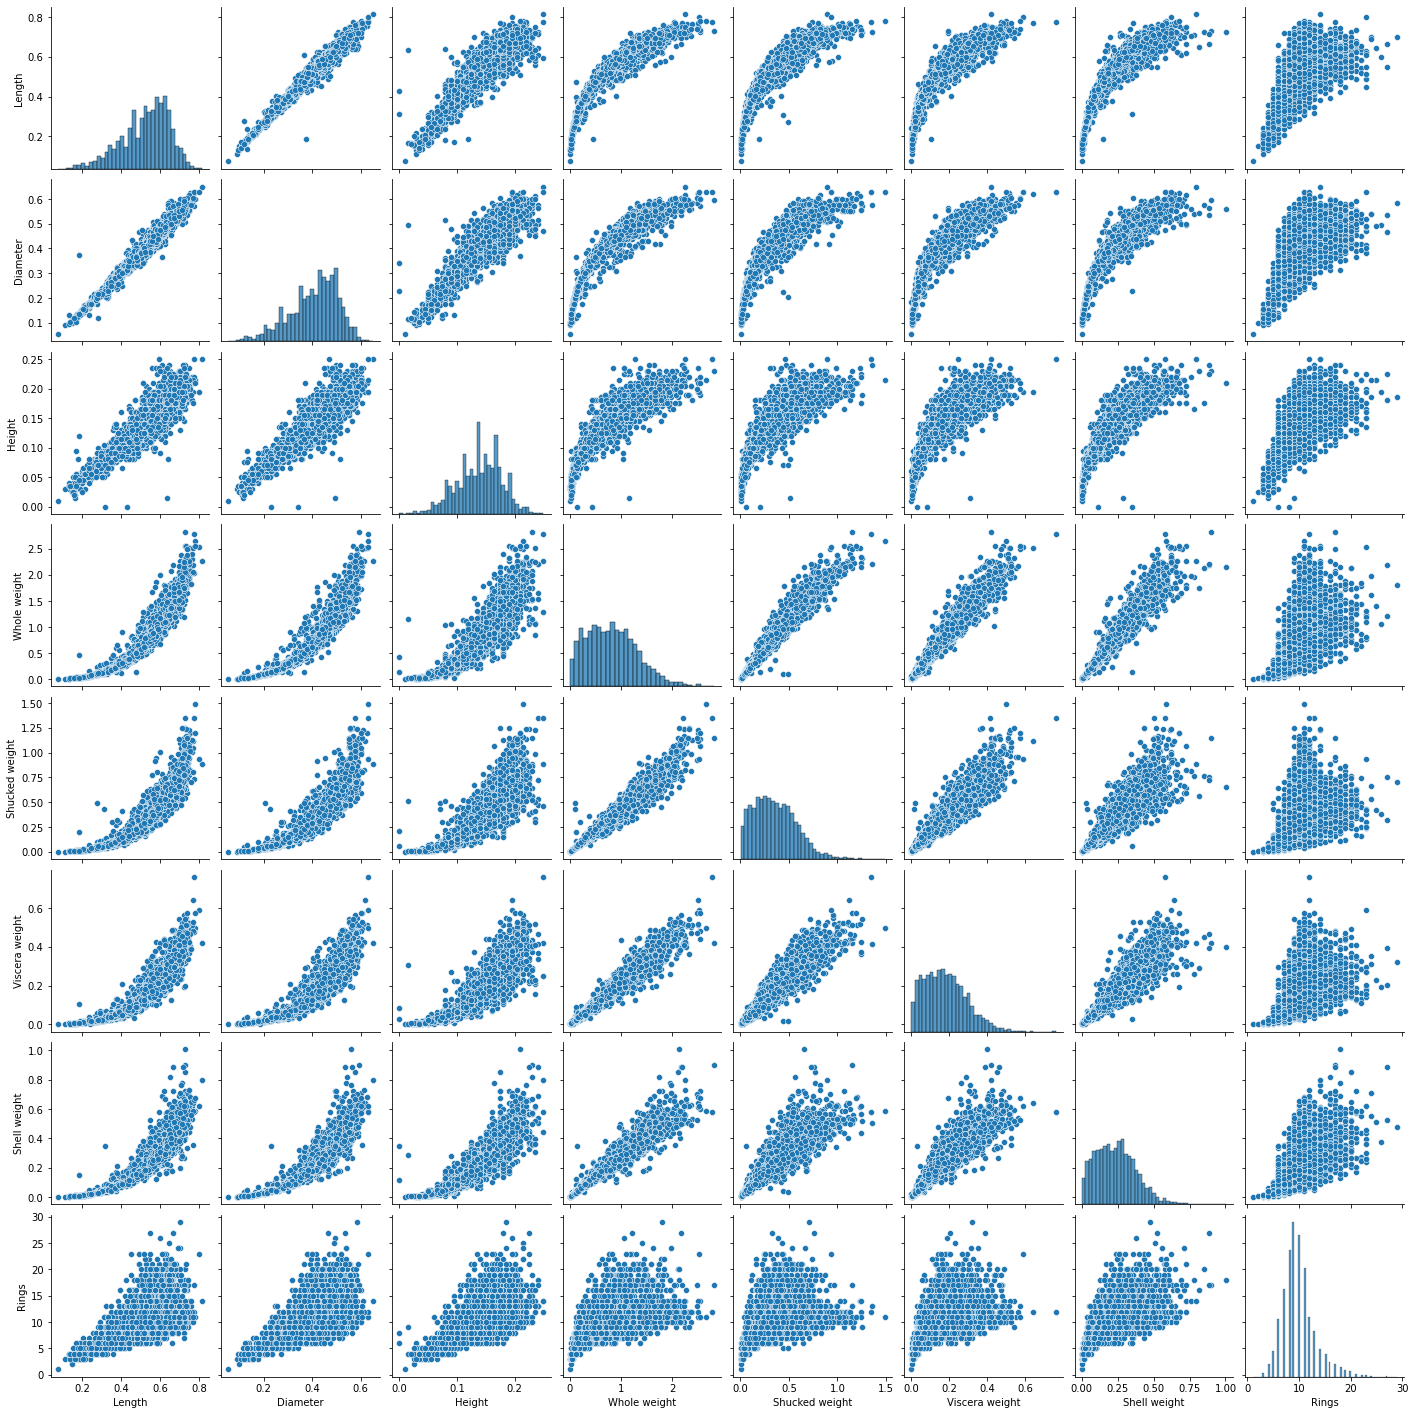

In [8]:
seaborn.pairplot(df)

Analyzing the data allows us to draw the following conclusions regarding linear stochastic relationships:

1) Between length and diameter
2) Between length and height
3) Between length and class number of rings
4) Between diameter and class number of rings
5) Between height and diameter
6) Between height and class number of rings
7) Between whole weight and shucked weight
8) Between whole weight and viscera weight
9) Between whole weight and shell weight
10) Between shucked weight and viscera weight
11) Between shucked weight and shell weight
12) Between viscera weight and shell weight

No dependencies are observed between:

- Whole weight and class number of rings
- Shucked weight and class number of rings
- Viscera weight and class number of rings
- Shell weight and class number of rings

In the remaining pairs, a stochastic nonlinear connection can be observed.

The data is homogeneous, but there are anomalies present (prior to this, two anomalous points were removed to enhance the determination of relationships).

Based on the data analysis in previous studies, a conclusion was drawn that the data does not follow a normal distribution. Therefore, we will attempt to apply the Spearman coefficient.

In [9]:
correl = df.corr(method = 'spearman')
correl

C:\Users\alyti\AppData\Local\Temp\ipykernel_17316\2187961175.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = df.corr(method = 'spearman')


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.983302,0.888857,0.972620,0.956871,0.952614,0.947869,0.604356
Diameter,0.983302,1.000000,0.896334,0.971306,0.950497,0.948339,0.954099,0.622885
Height,0.888857,0.896334,1.000000,0.916473,0.874435,0.901123,0.921921,0.658452
Whole weight,0.972620,0.971306,0.916473,1.000000,0.977066,0.975228,0.969410,0.630882
Shucked weight,0.956871,0.950497,0.874435,0.977066,1.000000,0.947632,0.917741,0.539525
Viscera weight,0.952614,0.948339,0.901123,0.975228,0.947632,1.000000,0.938085,0.614356
Shell weight,0.947869,0.954099,0.921921,0.969410,0.917741,0.938085,1.000000,0.692502
Rings,0.604356,0.622885,0.658452,0.630882,0.539525,0.614356,0.692502,1.000000


In [10]:
tva = st.t.ppf(0.975, df.shape[0] - 2)
lst = list(correl)

lst

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

In [11]:
for i in lst:
    for j in range(0,8):
        t = correl[i][j]*math.sqrt(df.shape[0] - 2)/math.sqrt(1-correl[i][j]*correl[i][j])
        if abs(t) <= tva:
            correl[i][j] = 0  

C:\Users\alyti\AppData\Local\Temp\ipykernel_17316\3848020699.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  t = correl[i][j]*math.sqrt(df.shape[0] - 2)/math.sqrt(1-correl[i][j]*correl[i][j])


In [12]:
def color_negative_red(val):
    color = 'red' if val == 0 else 'black'
    return 'color: %s' % color

In [13]:
correl.style.applymap(color_negative_red)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.983302,0.888857,0.972620,0.956871,0.952614,0.947869,0.604356
Diameter,0.983302,1.000000,0.896334,0.971306,0.950497,0.948339,0.954099,0.622885
Height,0.888857,0.896334,1.000000,0.916473,0.874435,0.901123,0.921921,0.658452
Whole weight,0.972620,0.971306,0.916473,1.000000,0.977066,0.975228,0.969410,0.630882
Shucked weight,0.956871,0.950497,0.874435,0.977066,1.000000,0.947632,0.917741,0.539525
Viscera weight,0.952614,0.948339,0.901123,0.975228,0.947632,1.000000,0.938085,0.614356
Shell weight,0.947869,0.954099,0.921921,0.969410,0.917741,0.938085,1.000000,0.692502
Rings,0.604356,0.622885,0.658452,0.630882,0.539525,0.614356,0.692502,1.000000


In [14]:
newDf = df
del newDf['Sex']

In [15]:
rho, pval = st.spearmanr(df['Diameter'], df['Rings'])
pval

0.0

In [16]:
rho, pval = st.spearmanr(newDf)
pd.DataFrame(rho)

,0,1,2,3,4,5,6,7
0,1.000000,0.983302,0.888857,0.972620,0.956871,0.952614,0.947869,0.604356
1,0.983302,1.000000,0.896334,0.971306,0.950497,0.948339,0.954099,0.622885
2,0.888857,0.896334,1.000000,0.916473,0.874435,0.901123,0.921921,0.658452
3,0.972620,0.971306,0.916473,1.000000,0.977066,0.975228,0.969410,0.630882
4,0.956871,0.950497,0.874435,0.977066,1.000000,0.947632,0.917741,0.539525
5,0.952614,0.948339,0.901123,0.975228,0.947632,1.000000,0.938085,0.614356
6,0.947869,0.954099,0.921921,0.969410,0.917741,0.938085,1.000000,0.692502
7,0.604356,0.622885,0.658452,0.630882,0.539525,0.614356,0.692502,1.000000


The correlation coefficient close to one is observed between:

- Length and Diameter
- Length and Whole Weight
- Length and Shucked Weight
- Length and Viscera Weight
- Length and Shell Weight

- Diameter and Whole Weight
- Diameter and Shucked Weight
- Diameter and Viscera Weight
- Diameter and Shell Weight

- Whole Weight and Shucked Weight
- Whole Weight and Viscera Weight
- Whole Weight and Shell Weight

- Viscera Weight and Shucked Weight

In [17]:
pd.DataFrame(pval)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

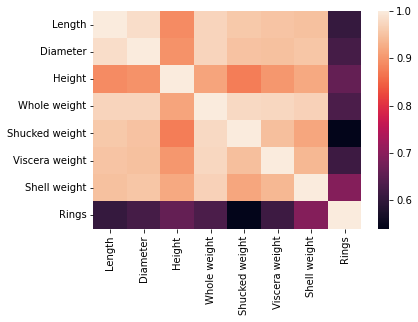

In [18]:
seaborn.heatmap(correl)

# Second part of the work

In [19]:
alpha = 0.05
norm_quantile = st.norm.ppf(1 - alpha / 2)


In [20]:
columns = ['Correlation Coefficient', 'Estimation', 'Confidence Interval', 'Statistic', 'Quantile', 'Conclusion', 'Association']
columns2 = ['Pearson Coefficient Estimation', 'Correlation Ratio Estimation', 'Statistic', 'Quantile', 'Conclusion', 'Association']

In [21]:
def corellationField(x, y):
    plt.title('Correlation field') ;
    plt.scatter(x,y)
    plt.show()

In [22]:
def Pearson(x, y):
    N = len(x)

    xs = 1/N * sum(x)
    ys = 1/N * sum(y) 

    xys = 1/N * sum(y[i] * x[i] for i in range(N)) 
    print(sum((y[i] - ys)*(y[i] - ys) for i in range(N)))
    sx = math.sqrt(1/N * sum((x[i] - xs)*(x[i] - xs) for i in range(N)))
    sy = math.sqrt(1/N * sum((y[i] - ys)*(y[i] - ys) for i in range(N)))
    print(sx, sy)
    r = (xys - xs * ys)/(sx*sy)
    #доверительные интервалы
    rn = r + r*(1-r*r)/(2*N) - norm_quantile * (1-r*r)/ math.sqrt(N-1)
    rv = r + r*(1-r*r)/(2*N) + norm_quantile * (1-r*r)/ math.sqrt(N-1)
    #статистика
    tva = st.t.ppf(0.975, N - 2)
    t = r * math.sqrt(N - 2) / math.sqrt(1 - r*r)
    print(r * math.sqrt(N - 2) )
    print( math.sqrt(1 - r*r))
    print(t)
    if abs(t) <= tva:
        lst.append(['Pearson', r, (rn, rv), t, tva, "The coefficient is not significant", "There is no correlation"])
    else:
        lst.append(['Pearson', r, (rn, rv), t, tva, "The coefficient is significant", "Linear correlation"])
    return r 

In [23]:
def rankify(X):
    N = len(X)
    x_sorted = sorted(X)
    Rank_X = []
    for i in range(N):
        r = 1
        s = 1

        for j in range(i):
            if x_sorted[j] < x_sorted[i]:
                r = r+1
            if x_sorted[j] == x_sorted[i]:
                s = s+1
         
        for j in range(i+1, N):
            if x_sorted[j] < x_sorted[i]:
                r = r+1
            if x_sorted[j] == x_sorted[i]:
                s = s+1

        Rank_X.append(r + (s-1) * 0.5)
    
    return list(zip(x_sorted, Rank_X))

In [24]:
def maxElems(x):
    prev = -1
    curr_rep_len = []
    max_rep_len = []
    for i in range(len(x)):
        if prev == x[i]:
            curr_rep_len.append(x[i])
        else:
            curr_rep_len.append(x[i-1])
            prev = x[i]
            if len(curr_rep_len) != 1:
                max_rep_len.append(curr_rep_len)
            curr_rep_len = []
    return max_rep_len


def rank(x, ranked_x):
    N = len(x)
    ranx = []
    for i in range(N):
        for j in range(N):
            if x[i] == ranked_x[j][0]:
                ranx.append(ranked_x[j][1])
                break
    return ranx
    
def Spearman(x, y):
    N = len(x)
    x_sorted = sorted(x)
    y_sorted = sorted(y)
    
    setx = set(x_sorted)
    sety = set(y_sorted)
    
    ranked_x = list(rankify(x))
    ranked_y = list(rankify(y))
  
    rankx, ranky = [], []
    
    rankx = rank(x, ranked_x)
    ranky = rank(y, ranked_y)

    if len(setx) == len(x_sorted) and len(sety) == len(y_sorted):
        tc = 1 - 6/(N*(N*N-1))*sum((rankx[i] - ranky[i])*(rankx[i] - ranky[i]) for i in range(N))
    else:
        rx = maxElems(x_sorted)
        A, B = 0, 0
        if len(rx) != 0:
            A = 1/12 * sum(len(rx[k])*len(rx[k])*len(rx[k]) - len(rx[k]) for k in range(len(rx)))
        ry = maxElems(y_sorted)
        if len(ry) != 0:
            B = 1/12 * sum(len(ry[k])*len(ry[k])*len(ry[k]) - len(ry[k]) for k in range(len(ry)))

        tcv = 1/6*N*(N*N-1)-sum((rankx[i] - ranky[i])*(rankx[i] - ranky[i]) for i in range(N))-A-B

        tcn = math.sqrt((1/6*N*(N*N-1) - 2*A)*(1/6*N*(N*N-1) - 2*B))
        tc = tcv / tcn   
        
    t = tc * math.sqrt(N - 2)/ math.sqrt(1 - tc*tc)
    tva = st.t.ppf(0.975, N - 2)
    if abs(t) <= tva:
        lst.append(['Spearman', tc, "------", t, tva, "The coefficient is not significant", "There is no monotonic correlation"])
    else:
        lst.append(['Spearman', tc, "------", t, tva, "The coefficient is significant", "There is monotonic correlation"])

In [25]:
def rankk(rankx, ranky):
    N = len(rankx)
    ranx = sorted(rankx)
    rany = []
    for i in range(N):
        ind = rankx.index(ranx[i])
        rany.append(ranky[ind])
    return rany

def Kendalla(x, y):
    N = len(x)
    x_sorted = sorted(x)
    y_sorted = sorted(y)
    
    setx = set(x_sorted)
    sety = set(y_sorted)
    
    ranked_x = list(rankify(x))
    ranked_y = list(rankify(y))
    
    rankx, ranky = [], []
    
    rankx = rank(x, ranked_x)
    ranky = rank(y, ranked_y)
     
    ranx = sorted(rankx)
    rany = rankk(rankx, ranky)

    S = 0
    
    if len(setx) == len(x_sorted) and len(sety) == len(y_sorted):
        for i in range(N):
            for j in range(i+1, N):
                if rany[i] < rany[j]:
                    S += 1 
                else:   
                    S += -1 

        tk = S / (1/2*N*(N-1))
    else:    
        for i in range(N-1):
            for j in range(i+1, N):
                if rany[i] < rany[j] and ranx[i] != ranx[j]:
                    S += 1
                elif rany[i] > rany[j] and ranx[i] != ranx[j]:   
                    S += -1
                else:
                    S += 0  
   
        rx = maxElems(x_sorted)
        C, D = 0, 0
        if len(rx) != 0:
            C = 1/2 * sum(len(rx[k])*(len(rx[k])-1) for k in range(len(rx)))
        ry = maxElems(y_sorted)
 
        if len(ry) != 0:
            D = 1/2 * sum(len(ry[k])*(len(ry[k])-1) for k in range(len(ry)))

        tk = S / math.sqrt((1/2*N*(N-1) - C)*(1/2*N*(N-1) - D))
    u = tk * math.sqrt(9*N*(N-1)) / math.sqrt(2*(2*N + 5))
    if abs(u) <= norm_quantile:
        lst.append(['Kendall', tk, "------", u, norm_quantile, "The coefficient is not significant", "There is no monotonic correlation"])
    else:
        lst.append(['Kendall', tk, "------", u, norm_quantile, "The coefficient is significant", "There is monotonic correlation"])
 

In [26]:
def ro(x, y):
    k = int(round(1 + 1.44 * np.log(len(x))))
    h = (max(x) - min(x))/k
    g = []
    xl = []
    newx = []
    xx, yy = [], []
    for l in range(1, k+1):
        gl = min(x) + (l-1)*h
        gln = min(x) + (l + 1 -1)*h
        g.append((gl, gln))
    for i in range(k):
        xl.append(0.5*(g[i][0]+g[i][1]))
    for i in range(len(x)):
        for j in range(k):
            if j != k-1:
                if x[i] >= g[j][0] and x[i] < g[j][1]:
                    newx.append((xl[j], y[i]))
                    xx.append(xl[j])
                    yy.append(y[i])
            else:
                if x[i] >= g[j][0] and x[i] <= g[j][1]:
                    newx.append((xl[j], y[i]))
                    xx.append(xl[j])
                    yy.append(y[i])

    newx = sorted(newx)

    corellationField(xx,yy)
    
    arr = []
    newarr = []


    
    arr.append(newx[0])
    for i in range(1, len(newx)):
        if newx[i-1][0] == newx[i][0]:
            arr.append(newx[i])
            if i == (len(newx)-1):
                newarr.append(arr)
        else:
            if i == (len(newx)-1):
                newarr.append(arr)
            newarr.append(arr)
            arr = []
            arr.append(newx[i])
    
    ysl = []
    N = len(x)
    
    for i in range(len(newarr)):
        ysl.append(1/len(newarr[i]) * sum(newarr[i][j][1] for j in range(len(newarr[i]))))

    ys = 1/N * sum(len(newarr[l])*ysl[l] for l in range(len(newarr)))

    rov = sum(len(newarr[i])*(ysl[i]-ys)*(ysl[i]-ys) for i in range(k))   
    ron = sum(sum((newarr[l][j][1] - ys)*(newarr[l][j][1] - ys) for j in range(len(newarr[l]))) for l in range(k))
    r = math.sqrt(rov/ron)
    
    f = (r*r / (k-1)) / ((1 - r*r)/(N-k))

    fk = st.f.ppf(1 - alpha, k - 1, N - k)
    fk2= st.f.ppf(1 - alpha, k - 2, N - k)
    if f <= fk:
        lst.append(['Correlation ratio', r, "------", f, fk, "Non-significant coefficient", "No stochastic correlation"])
    else:
        lst.append(['Correlation ratio', r, "------", f, fk, "Significant coefficient", "Stochastic correlation"])
        pr = Pearson(xx, yy)

        newf = ((r*r - pr*pr)/(k-2))/((1 - r*r)/(N-k))
        if newf <= fk2:
            newLst.append([pr, r, newf, fk2, "Equal", "Linear correlation"])
        else:
            newLst.append([pr, r,newf, fk2, "Not equal", "Nonlinear correlation"])

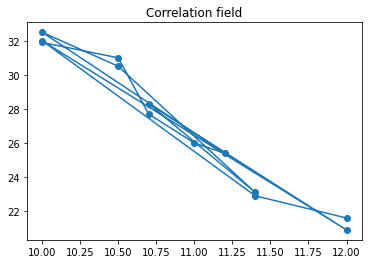

211.03692307692307
0.6704233406000285 4.029095365892402
-3.2514353166580126
0.19729267175005127
-16.480264004824434


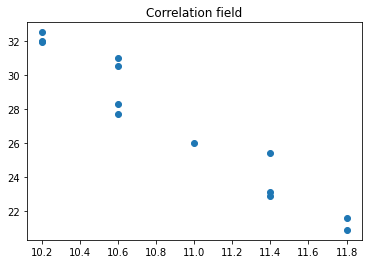

211.03692307692307
0.56902283104329 4.029095365892402
-3.2161530861903533
0.24427244964072137
-13.166253873167879


,Correlation Coefficient,Estimation,Confidence Interval,Statistic,Quantile,Conclusion,Association
0,Pearson,-0.980345,"(-1.0038354474074782, -0.9597891535539687)",-16.480264,2.200985,The coefficient is significant,Linear correlation
1,Spearman,-0.986177,------,-19.739618,2.200985,The coefficient is significant,There is monotonic correlation
2,Kendall,-0.947425,------,-4.508505,1.959964,The coefficient is significant,There is monotonic correlation
3,Correlation ratio,0.970716,------,32.655396,3.837853,Significant coefficient,Stochastic correlation
4,Pearson,-0.969707,"(-1.0056923932977377, -0.9381717705756931)",-13.166254,2.200985,The coefficient is significant,Linear correlation


,Pearson Coefficient Estimation,Correlation Ratio Estimation,Statistic,Quantile,Conclusion,Association
0,-0.969707,0.970716,0.090472,4.066181,Equal,Linear correlation


In [27]:
lst = []
newLst = []
# x = [8, 13, 17, 6, 14, 21, 2, 16, 18, 15, 9, 10, 7, 22, 3, 5, 12, 19, 4, 20, 11]
# y = [2.5, 1.6, 1.7, 2.4, 1.4, 1.4, 3, 1.8, 1.9, 1.5, 2, 1.5, 2.6, 1.5, 3.2, 3, 2, 1.4, 2.8, 1.4, 1.8]

# x = [1618.4, 1637.4, 1666.2, 1758.3, 1888.3, 1911.4, 1917.1, 1938.3, 1964, 1983.8, 2149.2, 2254.5, 2361.4, 2437.1, 2675.7]
# y = [138.2, 138.2, 145.3, 151.8, 156.4, 167, 170.3, 172, 173.6, 174.5, 188.5, 190.4, 191.3, 191.6, 222.6]

# x = [2675.7, 2437.1, 1938.3, 2149.2, 2254.5, 1964, 1911.4, 1888.3,  1637.4, 1666.2,  1618.4, 2361.4, 1983.8, 1917.1, 1758.3 ]
# y = [190.4, 156.4, 170.3, 174.5, 191.3, 188.5, 167, 191.6, 145.3, 138.2, 151.8, 222.6, 172, 138.2, 173.6]


# x = [18,11,16,22,21,14,15,5,13,12,8,10,3,9,7,2,19,20,4,6, 17]
# y = [46.7, 55.4, 48.1, 47.7, 50.5, 50.1, 53.4, 67.4, 52.2, 60, 67.1, 57, 64.3, 57.7, 66.6, 50.5, 46.4, 45.3, 74.2, 71.2,49.8]

# x = [8, 13, 17, 6, 14, 21, 2, 16, 18, 15, 9, 10, 7, 22, 3, 5, 12, 19, 4, 20, 11]
# y = [0.9, 0.9, 0.9, 1.3, 1.2, 0.8, 4.1, 1, 0.9, 1.3, 1.1, 0.8, 1, 0.8, 3.4, 1.5, 0.9, 0.7, 2.3, 1, 0.9]


# x = [18,11,16,22,21,14,15,5,13,12,8,10,3,9,7,2,19,20,4,6, 17]
# y = [51.7, 55, 53.4, 45, 45.5, 65, 66.7, 62.3, 53.4, 54.4, 64.8, 59,77.8, 60.4, 63.2, 69.2, 48.9, 48.5, 74.1, 60.6, 51]


x = [10, 10.5, 10.7, 11, 11.2, 10, 10.5, 11.4, 10.7, 12, 10, 11.4, 12]
y = [31.9, 31, 27.7, 26, 25.4, 32.5, 30.5, 23.1, 28.3, 20.9, 32, 22.9, 21.6]

plt.plot(x, y)
corellationField(x, y)

Pearson(x, y)

Spearman(x, y)

Kendalla(x,y)

ro(x, y)


display(pd.DataFrame(lst, columns = columns))
display(pd.DataFrame(newLst, columns = columns2))

In [28]:
x = [10, 10.5, 10.7, 11, 11.2, 10, 10.5, 11.4, 10.7, 12, 10, 11.4, 12]
y = [31.9, 31, 27.7, 26, 25.4, 32.5, 30.5, 23.1, 28.3, 20.9, 32, 22.9, 21.6]
Pearson(x, y)

211.03692307692307
0.6704233406000285 4.029095365892402
-3.2514353166580126
0.19729267175005127
-16.480264004824434


-0.9803446341331841

In [29]:
a, b = st.pearsonr(x, y)
print(round(a, 4), round(b, 4))

-0.9803 0.0


In [30]:
a, b = st.spearmanr(x, y)
print(round(a, 4), round(b, 4))

-0.9889 0.0


In [31]:
a, b = st.kendalltau(x, y)
print(round(a, 4), round(b, 4))

-0.9541 0.0
